# R-Practice/Processing Time Phrase Data

In [2]:
phrases <- read.csv('../data/time_phrases.csv')

In [3]:
# count number of rows, i.e. phrases

nrow(phrases)

[1] 3826

In [4]:
# count number of cols., i.e. data points

ncol(phrases)

[1] 19

In [5]:
str(phrases)

'data.frame':	3826 obs. of  19 variables:
 $ book          : Factor w/ 39 levels "1_Chronicles",..: 15 15 15 15 15 15 15 15 15 15 ...
 $ chapter       : int  1 2 2 2 2 2 3 3 3 3 ...
 $ verse         : int  1 2 2 5 5 17 8 14 17 22 ...
 $ clause.n      : int  427553 427680 427682 427693 427694 427738 427805 427835 427851 427866 ...
 $ phrase.n      : int  651503 651884 651890 651918 651923 652050 652259 652341 652388 652436 ...
 $ phrase.trans  : Factor w/ 981 levels "<D <CTJ <FRH CNH L H MLK YDQJHW",..: 520 325 325 963 963 392 823 725 725 84 ...
 $ preps         : Factor w/ 56 levels "<D","<D|<D","<D|L",..: 12 12 12 56 56 12 35 56 56 56 ...
 $ num.preps     : int  1 1 1 0 0 1 1 0 0 0 ...
 $ subs          : Factor w/ 205 levels "<CTJ/","<D/",..: 163 105 105 205 205 105 168 119 119 205 ...
 $ num.subs      : int  1 1 1 0 0 1 1 1 1 0 ...
 $ quants        : Factor w/ 93 levels "<CTJ/|<FR/","<CTJ/|<FRH/",..: 93 93 93 93 93 93 93 93 93 93 ...
 $ num.quants    : int  0 0 0 0 0 0 0 0 0 0 ...
 $

In [6]:
colnames(phrases)

[1] "book"           "chapter"        "verse"          "clause.n"      
 [5] "phrase.n"       "phrase.trans"   "preps"          "num.preps"     
 [9] "subs"           "num.subs"       "quants"         "num.quants"    
[13] "pdp.pattern"    "domain"         "verb.lex"       "verb.tense"    
[17] "position.at.vb" "position.at.cl" "cl.dependency"

In [7]:
head(phrases)

book,chapter,verse,clause.n,phrase.n,phrase.trans,preps,num.preps,subs,num.subs,quants,num.quants,pdp.pattern,domain,verb.lex,verb.tense,position.at.vb,position.at.cl,cl.dependency
Genesis,1,1,427553,651503,B R>CJT,B,1,R>CJT/,1,ø,0,prep-subs,?,BR>[,perf,2,1,I
Genesis,2,2,427680,651884,B H JWM H CBJ<J,B,1,JWM/,1,ø,0,prep-art-subs-art-adjv,N,KLH[,wayq,2,4,I
Genesis,2,2,427682,651890,B H JWM H CBJ<J,B,1,JWM/,1,ø,0,prep-art-subs-art-adjv,N,CBT[,wayq,2,3,I
Genesis,2,5,427693,651918,VRM,ø,0,ø,0,ø,0,advb,D,HJH[,impf,2,3,I
Genesis,2,5,427694,651923,VRM,ø,0,ø,0,ø,0,advb,D,YMX[,impf,2,3,I
Genesis,2,17,427738,652050,B JWM,B,1,JWM/,1,ø,0,prep-subs,Q,MWT[,impf,2,2,I


In [8]:
tail(phrases)

,book,chapter,verse,clause.n,phrase.n,phrase.trans,preps,num.preps,subs,num.subs,quants,num.quants,pdp.pattern,domain,verb.lex,verb.tense,position.at.vb,position.at.cl,cl.dependency
3821,2_Chronicles,36,5,515581,904472,>XD <FRH CNH,ø,0,>XD/,1,>XD/|<FRH/,2,subs-subs-subs,N,MLK[,perf,2,2,I
3822,2_Chronicles,36,9,515596,904516,CLC XDC W <FRH JWM,ø,0,CLC/|<FRH=/,2,CLC/|<FRH=/,2,subs-subs-conj-subs-subs,N,MLK[,perf,2,2,I
3823,2_Chronicles,36,10,515599,904525,L TCWBH H CNH,L,1,TCWBH/,1,ø,0,prep-subs-art-subs,N,CLX[,perf,2,2,I
3824,2_Chronicles,36,11,515604,904540,>XD <FRH CNH,ø,0,>XD/,1,>XD/|<FRH/,2,subs-subs-subs,N,MLK[,perf,2,2,I
3825,2_Chronicles,36,21,515639,904649,KL JWM H CMH,ø,0,KL/,1,ø,0,subs-subs-art-subs,N,CBT[,perf,2,1,I
3826,2_Chronicles,36,22,515641,904654,B CNH >XD L KWRC MLK PRS,B|L,2,CNH/,1,>XD/,1,prep-subs-subs-prep-nmpr-subs-nmpr,N,<WR[,perf,2,2,I


In [9]:
table(phrases$verb.tense)


impf impv infa infc perf ptca wayq weqt    ø 
 973   93    8  129  855   24  701  241  802 

In [10]:
domains <- table(phrases$domain)

domains


   ?    D    N    Q 
 245  113 1185 2283 

### Prepositions

In [11]:
num.preps <- table(phrases$num.preps) # number of preps per phrase

num.preps


   0    1    2    3    4    5    7 
1490 2055  229   34   10    7    1 

In [12]:
mean(phrases$num.preps) # average number of preps per phrase

[1] 0.7049137

In [13]:
# N.B., the number above is the avg. num. of preps per phrase
# but that is not the same as the average num. of phrases w/ preps.


has.prep <- sum(1880, 238, 32, 10, 6)
not.prep <- 1089
tot.prep <- sum(has.prep, not.prep)

has.prep/tot.prep

[1] 0.6654378

In [14]:
# but below is much more programmatic and informative

has.prep <- table(phrases$num.preps > 0)
perc.prep <- has.prep / sum(has.prep)

perc.prep <- round(perc.prep*100, 1)

print('percent of phrases with prep: ')

perc.prep

[1] "percent of phrases with prep: "



FALSE  TRUE 
 38.9  61.1 

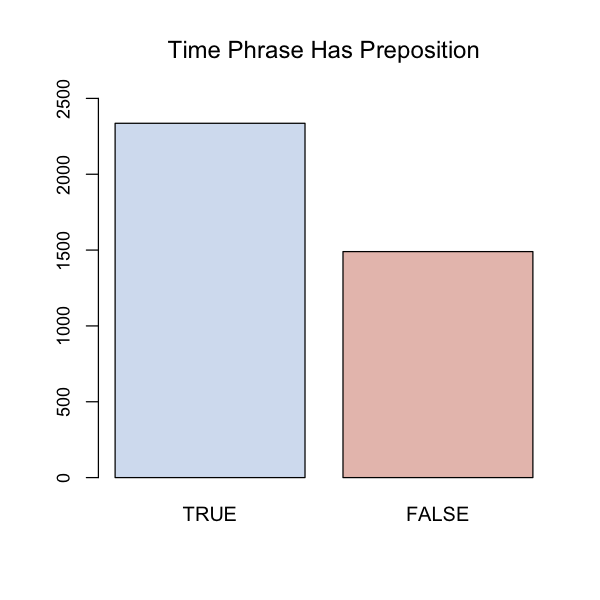

In [15]:
options(repr.plot.width=5, repr.plot.height=5) # plot dimensions in ipynb
colors = c('#D5E1F1', '#E8C2BA')

barplot(
        has.prep[c(2, 1)],
        main='Time Phrase Has Preposition',
        ylim = c(0, 2500),
        col = colors,
        cex.axis = .9,
        
     )


### Substantives

In [16]:
table(phrases$num.subs) # numbers of subs. per phrase


   0    1    2    3    4 
 844 2796  169   15    2 

In [17]:
mean(phrases$num.subs) # average number of substantives per phrase

[1] 0.8329848

In [18]:
with.subs = table(phrases$num.subs > 0) # phrases with substantives

with.subs


FALSE  TRUE 
  844  2982 

In [19]:
perc.subs = round(with.subs / sum(with.subs) * 100, 1)

perc.subs


FALSE  TRUE 
 22.1  77.9 

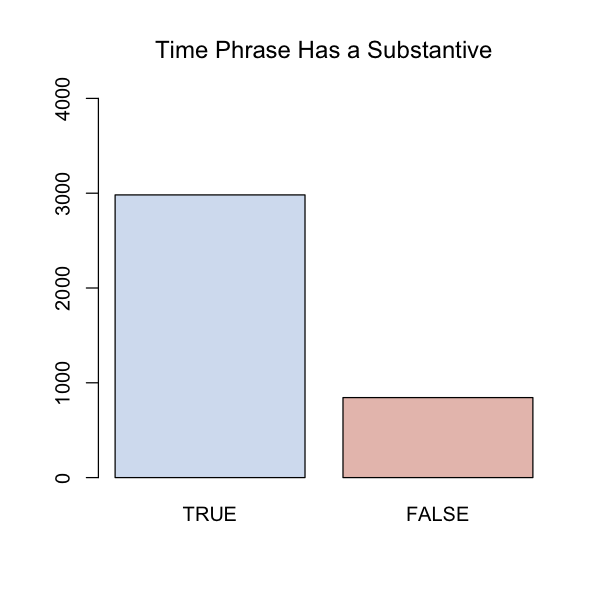

In [20]:
options(repr.plot.width=5, repr.plot.width=5)
barplot(
        with.subs[c(2, 1)],
        main='Time Phrase Has a Substantive',
        col=colors,
        ylim=c(0, 4000),
       )

### method to measure margin of error

via Martijn

In [21]:
binom.test(700, 1200, 0.5)


	Exact binomial test

data:  700 and 1200
number of successes = 700, number of trials = 1200, p-value = 8.535e-09
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5548467 0.6114106
sample estimates:
probability of success 
             0.5833333 


In [22]:
c(seq(1,10, by=2))

[1] 1 3 5 7 9

## How are Time Phrases Distributed throughout the HB?

Goal: make a strip chart to illustrate the spread of time phrases throughout the traditional corpus.

In [23]:
head(phrases)

book,chapter,verse,clause.n,phrase.n,phrase.trans,preps,num.preps,subs,num.subs,quants,num.quants,pdp.pattern,domain,verb.lex,verb.tense,position.at.vb,position.at.cl,cl.dependency
Genesis,1,1,427553,651503,B R>CJT,B,1,R>CJT/,1,ø,0,prep-subs,?,BR>[,perf,2,1,I
Genesis,2,2,427680,651884,B H JWM H CBJ<J,B,1,JWM/,1,ø,0,prep-art-subs-art-adjv,N,KLH[,wayq,2,4,I
Genesis,2,2,427682,651890,B H JWM H CBJ<J,B,1,JWM/,1,ø,0,prep-art-subs-art-adjv,N,CBT[,wayq,2,3,I
Genesis,2,5,427693,651918,VRM,ø,0,ø,0,ø,0,advb,D,HJH[,impf,2,3,I
Genesis,2,5,427694,651923,VRM,ø,0,ø,0,ø,0,advb,D,YMX[,impf,2,3,I
Genesis,2,17,427738,652050,B JWM,B,1,JWM/,1,ø,0,prep-subs,Q,MWT[,impf,2,2,I


In [24]:
# make subsequent clause enumerations for the strip chart

first.clnode <- 427553 - 1

phrases$clause.num <- phrases$clause.n-first.clnode

head(phrases, 2)

book,chapter,verse,clause.n,phrase.n,phrase.trans,preps,num.preps,subs,num.subs,quants,num.quants,pdp.pattern,domain,verb.lex,verb.tense,position.at.vb,position.at.cl,cl.dependency,clause.num
Genesis,1,1,427553,651503,B R>CJT,B,1,R>CJT/,1,ø,0,prep-subs,?,BR>[,perf,2,1,I,1
Genesis,2,2,427680,651884,B H JWM H CBJ<J,B,1,JWM/,1,ø,0,prep-art-subs-art-adjv,N,KLH[,wayq,2,4,I,128


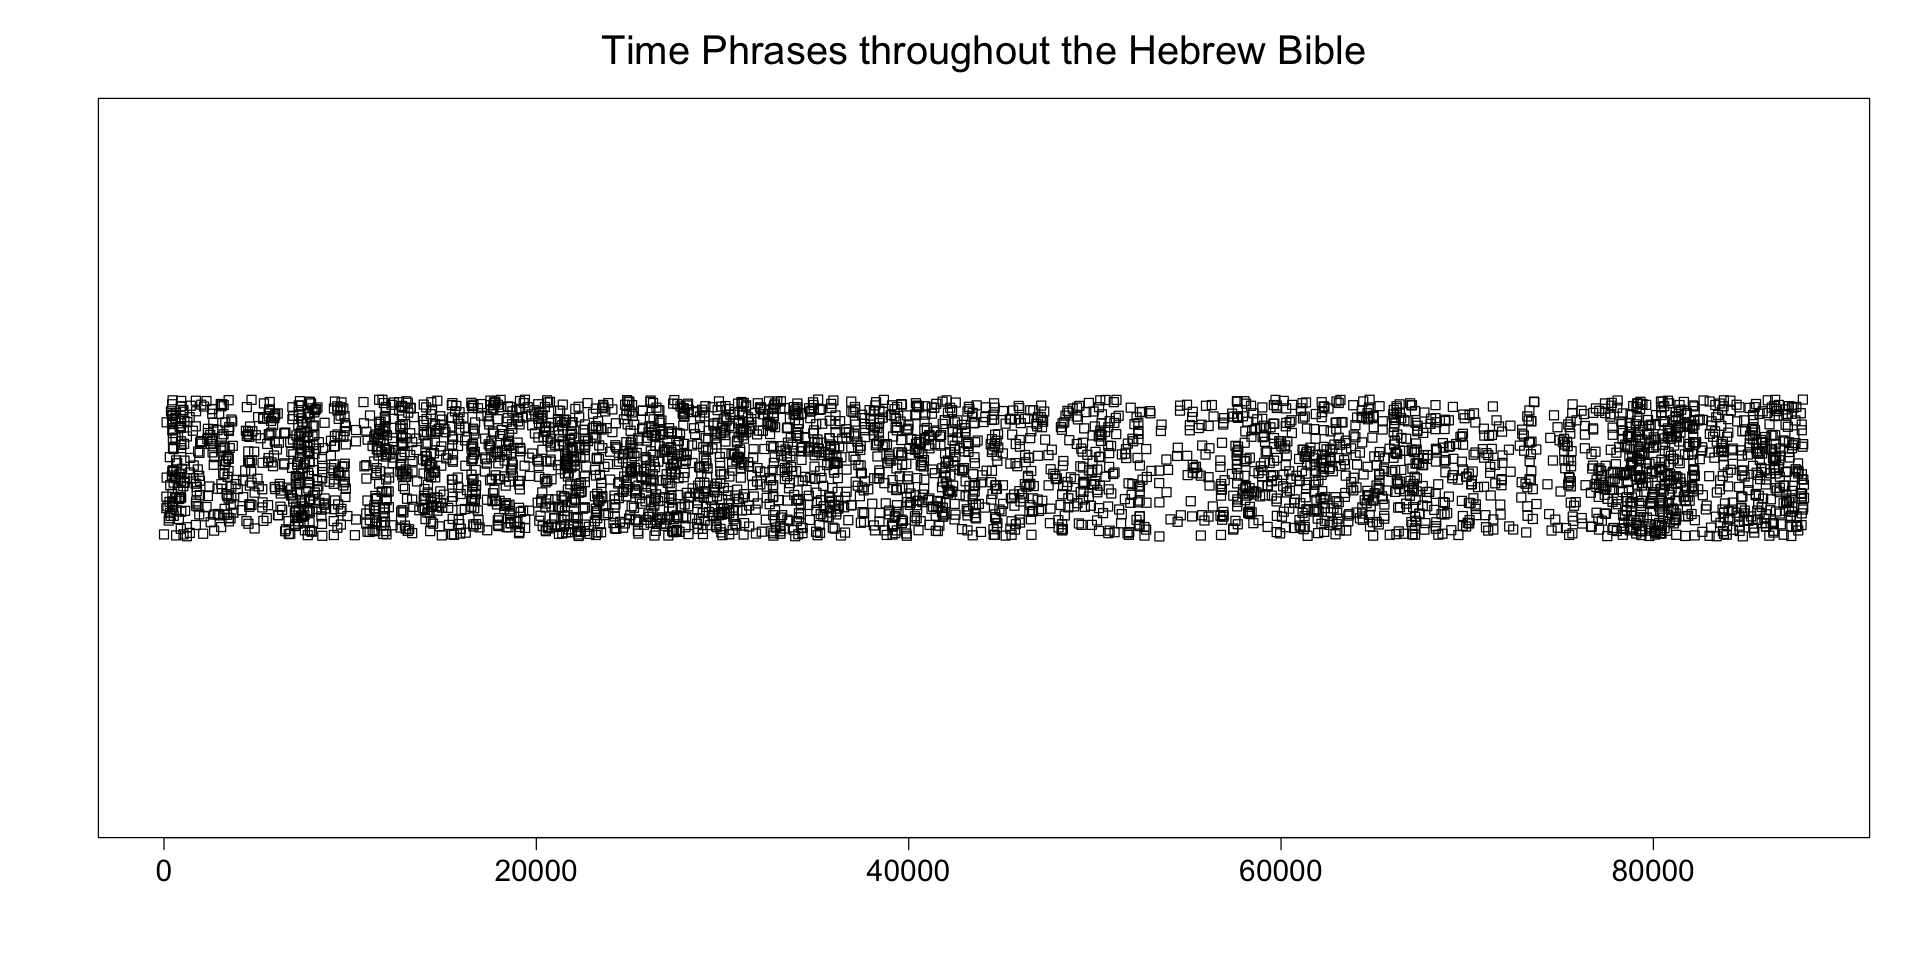

In [25]:
options(repr.plot.height=8, repr.plot.width=16)

stripchart(phrases$clause.num, 
           main = 'Time Phrases throughout the Hebrew Bible',
           method = 'jitter',
           cex.axis = 1.5,
           cex.main = 2
          )

This is more or less spread out through the whole corpus, but with some small gaps between clauses 60000 and 80000.

## Tense and Time Phrases

In [26]:
phrase.tenses <- table(phrases$verb.tense)

phrase.tenses


impf impv infa infc perf ptca wayq weqt    ø 
 973   93    8  129  855   24  701  241  802 

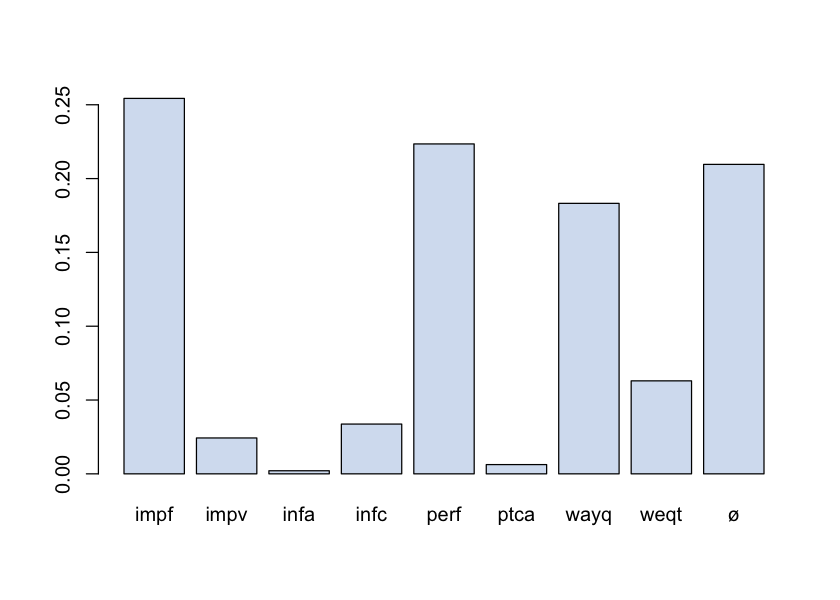

In [27]:
options(repr.plot.height=5, repr.plot.width=7) # set plots back to default

phrase.tense.perc <- phrase.tenses/sum(phrase.tenses)

barplot(phrase.tense.perc,
        col=colors[1]
       )

In [28]:
wlm.phrases <- phrases[phrases$subs == '<WLM/',]
wlm.tenses <- table(wlm.phrases$verb.tense)

wlm.tense.perc <- wlm.tenses/sum(wlm.tenses)

wlm.tense.perc


      impf       impv       infa       infc       perf       ptca       wayq 
0.44864865 0.03243243 0.00000000 0.08648649 0.11351351 0.00000000 0.03243243 
      weqt          ø 
0.11351351 0.17297297 

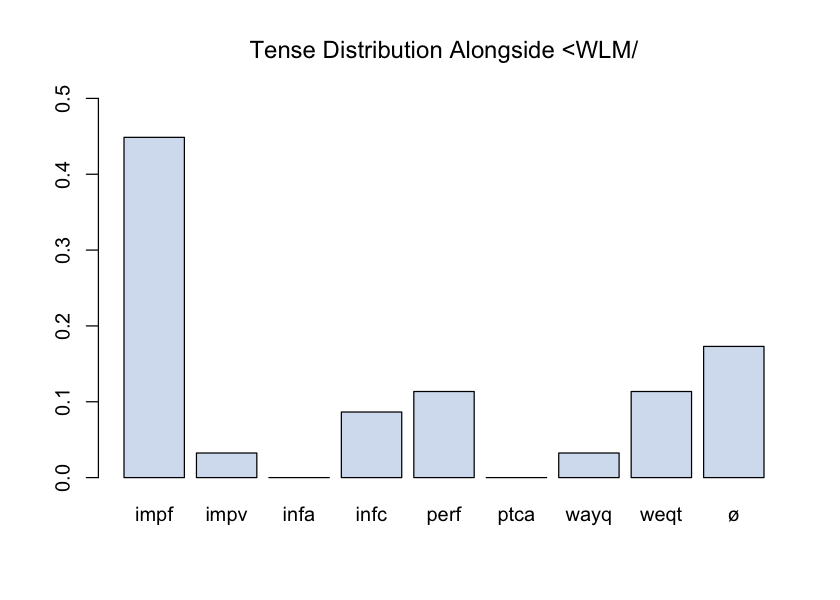

In [29]:
barplot(wlm.tense.perc,
        main = 'Tense Distribution Alongside <WLM/',
        ylim = c(0, .5),
        col = colors[1]
       )

## Comparison of Tense and Preposition

In [30]:
tense.prep <- table(phrases$prep, phrases$verb.tense)

In [31]:
as.data.frame.matrix(tense.prep)

,impf,impv,infa,infc,perf,ptca,wayq,weqt,ø
<D,98,7,0,11,51,0,61,37,45
<D|<D,1,0,0,0,0,0,0,0,0
<D|L,0,0,0,0,2,0,4,1,1
<D|MN,1,0,0,0,0,0,0,0,0
<L,3,0,0,0,1,0,0,0,1
<M,0,0,0,0,1,0,0,0,0
>L,0,0,0,0,0,0,1,0,0
>T,1,0,0,0,0,0,0,0,0
>T|>T,0,0,0,0,0,0,1,0,0
>XR/,34,0,0,0,43,0,43,0,10


In [32]:
# change table to matrix
# https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Getting-and-setting-attributes
# is this best method?

attributes(tense.prep)$class <- 'matrix'

In [33]:
head(tense.prep)

,impf,impv,infa,infc,perf,ptca,wayq,weqt,ø
<D,98,7,0,11,51,0,61,37,45
<D|<D,1,0,0,0,0,0,0,0,0
<D|L,0,0,0,0,2,0,4,1,1
<D|MN,1,0,0,0,0,0,0,0,0
<L,3,0,0,0,1,0,0,0,1
<M,0,0,0,0,1,0,0,0,0


In [34]:
tense.prep <- tense.prep[order(rowSums(tense.prep), decreasing = T),]

t(tense.prep)

,ø,B,<D,L,MN,>XR/,B|L,B|B,K,MN|<D,⋯,L|<D,L|>XR/,L|L|L,L|L|L|B|B|B|B,L|MN|B,MN|<D|L,MN|B|MN|B,MN|L|<D,MN|MN,MN|MN|L|L|MN
impf,337,288,98,131,16,34,2,19,11,11,⋯,0,0,0,0,0,0,1,0,0,0
impv,33,24,7,15,1,0,0,0,8,2,⋯,0,0,0,0,0,0,0,0,0,1
infa,3,2,0,1,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
infc,54,38,11,13,0,0,1,3,4,1,⋯,0,0,1,0,0,0,0,0,0,0
perf,325,240,51,38,45,43,44,12,12,5,⋯,0,1,0,0,0,0,0,1,0,0
ptca,20,1,0,0,3,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
wayq,200,246,61,22,53,43,28,6,9,6,⋯,1,0,0,0,0,1,0,0,0,0
weqt,67,109,37,17,2,0,0,4,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ø,451,149,45,58,32,10,10,6,7,9,⋯,0,0,0,1,1,0,0,0,1,0


## Convert to Ratios

In [36]:
# obtain ratios with apply function (thanks Martijn)

tense.prep.perc <- apply(tense.prep, 1, function (row) {row / sum(row)})

t(tense.prep.perc)

,impf,impv,infa,infc,perf,ptca,wayq,weqt,ø
ø,0.22617450,0.022147651,0.002013423,0.03624161,0.2181208,0.013422819,0.13422819,0.04496644,0.30268456
B,0.26253418,0.021877849,0.001823154,0.03463993,0.2187785,0.000911577,0.22424795,0.09936190,0.13582498
<D,0.31612903,0.022580645,0.000000000,0.03548387,0.1645161,0.000000000,0.19677419,0.11935484,0.14516129
L,0.44406780,0.050847458,0.003389831,0.04406780,0.1288136,0.000000000,0.07457627,0.05762712,0.19661017
MN,0.10526316,0.006578947,0.000000000,0.00000000,0.2960526,0.019736842,0.34868421,0.01315789,0.21052632
>XR/,0.26153846,0.000000000,0.000000000,0.00000000,0.3307692,0.000000000,0.33076923,0.00000000,0.07692308
B|L,0.02352941,0.000000000,0.000000000,0.01176471,0.5176471,0.000000000,0.32941176,0.00000000,0.11764706
B|B,0.36538462,0.000000000,0.038461538,0.05769231,0.2307692,0.000000000,0.11538462,0.07692308,0.11538462
K,0.21568627,0.156862745,0.000000000,0.07843137,0.2352941,0.000000000,0.17647059,0.00000000,0.13725490
MN|<D,0.31428571,0.057142857,0.000000000,0.02857143,0.1428571,0.000000000,0.17142857,0.02857143,0.25714286


In [37]:
 sum(tense.prep.perc[,1])

[1] 1

## Experimentation and Playing

In [47]:
# sum of deviations is always 0?

test <- c(1, 2, 4, 6, 10, 12)

deviations <- test-mean(test)

sum(deviations)

[1] 1.776357e-15

The resulting number above is incredibly small and can be attributed to rounding.

If a more consistent distribution is applied, the result is 0:

In [51]:
test <- c(1, 2, 3, 4, 5, 6, 7)

deviations <- test-mean(test)

sum(deviations)

[1] 0

In [53]:
help(which)

In [55]:
log(10)

[1] 2.302585

In [56]:
help(log)

In [59]:
log10(11)

[1] 1.041393

In [3]:
test <- table(c('man', 'bird', 'dog', 'man', 'bird', 'rabbit' , 'man'))

test


  bird    dog    man rabbit 
     2      1      3      1 

In [6]:
t(test)

      
       bird dog man rabbit
  [1,]    2   1   3      1